In [1]:
from sklearn import ensemble, cross_validation, learning_curve, metrics
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GroupKFold

from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats.kde import gaussian_kde
from scipy.optimize import brentq

import itertools

C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that o

In [2]:
triplexes = pd.read_csv('basetriples_nosam.csv', header=0, sep='\t')

In [3]:
triplexes.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,1b23.cif1_R,110,R.4SU.8.R.G.15.R.PSU.55.,-_-_-,12.32_21.81_22.62,0,0,1,0,0,...,1,0,0,0,1,0,0,7,0,0
1,1b23.cif1_R,110,R.4SU.8.R.G.48.R.PSU.55.,cSS_-_-,4.06_19.17_22.62,1,0,0,0,0,...,1,0,0,0,1,0,0,7,0,0
2,1b23.cif1_R,110,R.4SU.8.R.MIA.37.R.G.48.,-_-_cSS,33.9_36.92_4.06,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,0
3,1b23.cif1_R,120,R.A.13.R.G.15.R.G.27.,-_-_-,10.88_28.24_19.46,1,0,0,0,0,...,1,0,0,0,1,0,0,9,1,0
4,1b23.cif1_R,120,R.A.9.R.U.25.R.A.46.,-_-_-,12.5_15.93_4.24,0,1,0,0,1,...,0,0,0,0,0,0,0,5,1,0


In [4]:
### !!!!! необходимые данные - train

triplexes_data = triplexes.iloc[:, 5:475]
triplexes_target = triplexes.iloc[:, 476]

In [8]:
triplexes_test = pd.read_csv('basetriples_sam.csv', header=0, sep='\t')

In [9]:
triplexes_test.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,2qwy.cif1_C,100,C.U.31.C.A.35.C.U.44.,-_-_-,11.45_33.53_36.83,1,0,0,0,0,...,0,0,1,0,1,0,0,3,0,0
1,2qwy.cif1_C,100,C.U.11.C.A.14.C.G.17.,-_-_-,18.15_15.21_15.5,1,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
2,2qwy.cif1_C,100,C.C.16.C.A.36.C.A.37.,-_-_-,44.83_5.03_42.8,0,0,1,1,0,...,0,0,0,0,0,0,0,2,0,0
3,2qwy.cif1_C,100,C.G.39.C.U.44.C.A.45.,-_-_-,25.15_5.23_27.48,0,0,1,0,1,...,0,0,0,0,0,0,0,2,0,0
4,2qwy.cif1_C,112,C.U.21.C.C.29.C.A.33.,-_cSW_-,26.88_8.7_23.88,0,0,1,0,1,...,1,0,0,0,0,0,1,11,3,0


In [22]:
### !!!!! необходимые данные - test

triplexes_test_data = triplexes_test.iloc[:, 5:475]
triplexes_test_target = triplexes_test.iloc[:, 476]

In [5]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap="YlGnBu"):  #"YlGnBu" plt.cm.gray_r
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    print("CONFUSION MATRIX")
    print(df_confusion)
    a = itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1]))
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        if i == 2:
            i_ = 'All'
        else:
            i_ = i
        if j == 2:
            j_ = 'All'
        else:
            j_ = j
        plt.text(i, j, df_confusion[i_][j_], horizontalalignment="center", color='black')
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    plt.show()
    
    
    
def probability_density(y_prob, y):
    kde1 = gaussian_kde(y_prob[y == 1])
    kde2 = gaussian_kde(y_prob[y == 0])
    
    x1 = np.linspace(np.min(y_prob[y == 1]),np.max(y_prob[y == 1]),500)
    x2 = np.linspace(np.min(y_prob[y == 0]),np.max(y_prob[y == 0]),500)
    
    try:
        treshold = brentq(lambda x : kde1(x) - kde2(x), x2[np.argmax(kde1(x1))], x1[np.argmax(kde2(x2))])
    except ValueError:
        treshold = 0.5
        
    plt.fill_between(x1,kde1(x1),0, color='darkblue', alpha = 0.5, label = 'Triplexes')
    plt.fill_between(x2,kde2(x2), 0, color='darkgrey', alpha = 0.5, label = 'Non-triplexes')
    plt.axvline(x1[np.argmax(kde1(x1))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(x2[np.argmax(kde2(x2))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(treshold, color='black', linestyle='-.', alpha = 0.7, label = str(round(treshold,2)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title('Probability Distributions')
    plt.xlabel('Probabilities')
    plt.show()


In [6]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [7]:
rf_classifier.fit(triplexes_data, triplexes_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [11]:
prediction_result = rf_classifier.predict(triplexes_test_data)
predict_proba = rf_classifier.predict_proba(triplexes_test_data)

In [19]:
#PREDICTED PROBABILITIES
for index, row in triplexes_test.iterrows():
    if triplexes_test_target[index] != prediction_result[index]:
        print(row['type'], row['dssrs'], row['bps'], row['dists'], "PROBA: ", predict_proba[index][1])

111 C.G.6.C.U.26.C.U.38. cWW_-_tSW 10.21_7.35_8.39 PROBA:  0.43320114953969
111 C.G.8.C.C.23.C.G.42. cW._cWW_cWH 14.54_10.41_11.07 PROBA:  0.4390400731255673
111 C.A.9.C.G.22.C.C.43. ..._cWW_cWH 15.07_10.65_12.28 PROBA:  0.37719574919976373
111 C.U.12.C.U.20.C.A.46. -_cWW_cWH 15.24_10.24_8.27 PROBA:  0.4876878698716853
111 C.A.24.C.U.40.C.A.41. cWW_-_tSH 10.76_6.42_10.34 PROBA:  0.4326070508293589
112 A.G.43.A.A.46.A.C.59. -_-_cWW 14.44_11.52_10.45 PROBA:  0.7272302195675654
123 A.G.35.A.A.61.A.A.62. -_-_- 15.41_5.16_19.73 PROBA:  0.5527912459470767
111 A.G.11.A.C.44.A.G.58. cSS_cWW_- 5.67_10.78_13.72 PROBA:  0.12891027367912117
111 A.A.12.A.G.43.A.C.59. cSS_cWW_- 5.69_10.45_8.43 PROBA:  0.15253261088184833
111 A.A.24.A.U.64.A.A.85. -_cWW_tWS 9.81_10.55_9.31 PROBA:  0.024175386240506653


AUC_TRAIN =  0.885156435371963

AUC =  0.7791644058600109


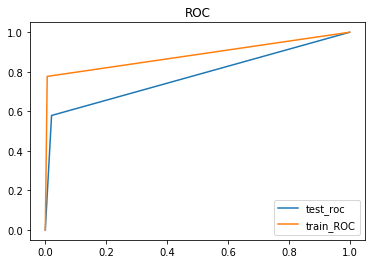

Probability density for train


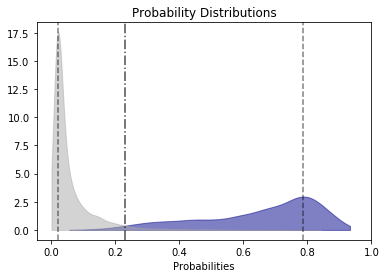

Probability density for test


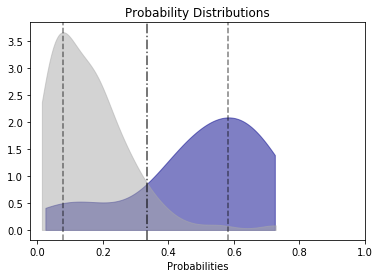


[[95  2]
 [ 8 11]]
CONFUSION MATRIX
Predicted    0   1  All
Actual                 
0           95   2   97
1            8  11   19
All        103  13  116


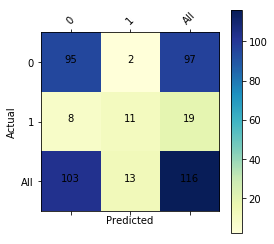


REPORT
             precision    recall  f1-score   support

          0       0.92      0.98      0.95        97
          1       0.85      0.58      0.69        19

avg / total       0.91      0.91      0.91       116

ACCURACY =  0.9137931034482759
-----------------


In [21]:
#TRY TO PREDICT TRAIN
prediction_train = rf_classifier.predict(triplexes_data)
prediction_prob_train = rf_classifier.predict_proba(triplexes_data)
fpr_train, tpr_train, _ = metrics.roc_curve(triplexes_target,  prediction_train)
auc_train = metrics.roc_auc_score(triplexes_target, prediction_train)
print("AUC_TRAIN = ", auc_train)
    
#---------------------------------
print("")
fpr, tpr, _ = metrics.roc_curve(triplexes_test_target,  prediction_result)
auc = metrics.roc_auc_score(triplexes_test_target, prediction_result)
print("AUC = ", auc)
line_test, = plt.plot(fpr, tpr, label='test_roc')
line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
plt.title("ROC")
plt.show()
    
print("Probability density for train")
probability_density(prediction_prob_train[:, 1], triplexes_target)
print("Probability density for test")
probability_density(predict_proba[:, 1], triplexes_test_target)
    
print("")
print(confusion_matrix(triplexes_test_target, prediction_result))
plot_confusion_matrix(pd.crosstab(triplexes_test_target, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))


print("")
print("REPORT")
print(classification_report(triplexes_test_target, prediction_result))
print("ACCURACY = ", accuracy_score(triplexes_test_target, prediction_result))
print("-----------------")
